# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.284213e+01     1.676168e+01
 * time: 0.0041849613189697266
     1     6.433864e+01     9.476251e+00
 * time: 0.012187004089355469
     2     5.852173e+01     1.117831e+01
 * time: 0.03034186363220215
     3     4.274192e+01     9.866480e+00
 * time: 0.05505180358886719
     4     3.318914e+01     9.593856e+00
 * time: 0.0794668197631836
     5     3.099358e+01     8.742545e+00
 * time: 0.17805790901184082
     6     1.552479e+01     4.455469e+00
 * time: 0.19989681243896484
     7     1.073856e+01     2.132617e+00
 * time: 0.2178199291229248
     8     9.446599e+00     2.493731e+00
 * time: 0.23581695556640625
     9     8.718417e+00     2.246370e+00
 * time: 0.2536280155181885
    10     8.097587e+00     4.383551e+00
 * time: 0.2679758071899414
    11     7.563011e+00     1.994898e+00
 * time: 0.28204989433288574
    12     7.116645e+00     3.013195e+00
 * time: 0.2965428829193115
    13     6.795159e+00     2.278409e+00
 * time: 0

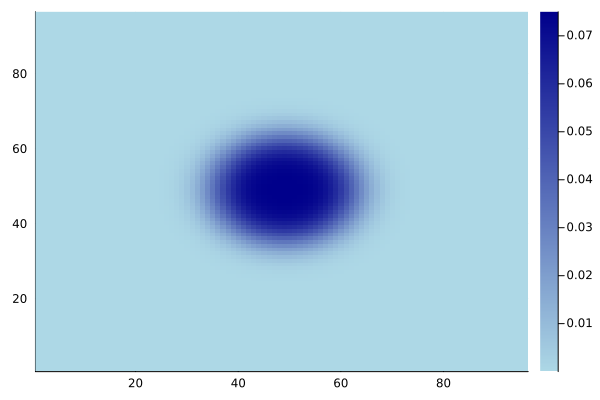

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)